# Lab 1-Credit Card Fraud Wrangling and EDA

#### Name: Zeqiu.Yu  NetID: ZYV9962  Time: April 6, 2023

## 1. Introduction

## 2. Data

The dataset is the simulation of the real card transaction of a financial institution's customers. For the reason that the dataset is fictional, it doesn't include no real personal information and no people, places and things will get affected by using this dataset, but it is a good toy dataset to practice Machine Learning and data processing skills.  
  
The dataset includes 786363 transaction information of 5000 customers. The raw data provided is very dirty that contains variables with totally dublicated values(Share the same sample with other variables) or missing values. These variables are nonsignificant. MVV(Missing value varibales): `echoBuffer`, `merchantCity`, `merchantState`, `merchantZip`, `posOnPremises`, `recurringAuthInd`. (DVV)Duplicated value variables: `accountNumber` and `customerId` are the same. Then we remove MVV and `customerId`. After that, we get 22 variables left:  

|**`Varaibles`** | Data Type | Description |
| --- | --- | --- |
|**`accountNumber`**| int64 | a unique identifier for the customer account associated with the transaction |
|**`creditLimit`**| float64 | the maximum amount of credit available to the customer on their account |
|**`availableMoney`**| float64 | the amount of credit available to the customer at the time of the transaction |
|**`transactionDateTime`**| object | the date and time of the transaction |
|**`transactionAmount`**| float64 | the amount of the transaction |
|**`merchantName`**| object | the name of the merchant where the transaction took place |
|**`acqCountry`**| object | the country where the acquiring bank is located |
|**`merchantCountryCode`**| object | the country where the merchant is located |
|**`posEntryMode`**| float64 | the method used by the customer to enter their payment card information during the transaction |
|**`posConditionCode`**| float64 | the condition of the point-of-sale terminal at the time of the transaction |
|**`merchantCategoryCode`**| object | the category of the merchant where the transaction took place |
|**`currentExpDate`**| object | the expiration date of the customer's payment card |
|**`accountOpenDate`**| object | the date the customer's account was opened |
|**`dateOfLastAddressChange`**| object | the date the customer's address was last updated |
|**`cardCVV`**| int64 | the three-digit CVV code on the back of the customer's payment card |
|**`enteredCVV`**| int64 | the CVV code entered by the customer during the transaction |
|**`cardLast4Digits`**| int64 | the last four digits of the customer's payment card |
|**`transactionType`**| object | the type of transaction |
|**`currentBalance`**| float64 | the current balance on the customer's account |
|**`cardPresent`**| bool | whether or not the customer's payment card was present at the time of the transaction |
|**`expirationDateKeyInMatch`**| bool | whether or not the expiration date of the payment card was entered correctly during the transaction |
|**`isFraud`**| bool | whether or not the transaction was fraudulent |

Our target is to learn the relationship between the data and get as much information as possible from the dataset. 

### 2.1 Data cleaning and preprocessing

For data cleaning, I find `acqCountry`, `merchantCountryCode`, `posEntryMode`, `posConditionCode`, `transactionType` have missin values, 4572, 724, 4054, 409 and 698 respectively. We can find that they are essentially categorical varaibles. After dropping all of the, I find some relevant problems raised and then I checked the fraud rate: 0.0327, 0.1133, 0.0664, 0.0538 and 0.0201 repectively. They all above the average fraud rate: 0.0158, which means they have important information that cannot be lefr out. Then for `posEntryMode` and `posConditionCode` I replace them with 9999 to distinguish them and replace other missing values with unknown. Similarly, for the outliers, considering the dataset is large enough, according to the Law of Large Numbers, I assmue the columns of the dataset follow the normal distribution. One of the choice is to standardize the dataset and choose the data within 3 standard deviation(Using variables: `creditLimit`, `availableMoney`, `transactionAmount`, `currentBalance`, `posEntryMode`, `posConditionCode`). If we don't solve the outliers, the model will get skewed. Then I find this also leads to the information loss. Then I drop the outlier according to the specific criterion. 

The data may have outliers, missing values and other issues. We look at them just using the dataset without involving the models and try methods to solve these issues.  
  
For the outliers, considering the dataset is large enough, according to the Law of Large Numbers, I assmue the columns of the dataset follow the normal distribution. One of the choice is to standardize the dataset and choose the data within 3 standard deviation(Using variables: `creditLimit`, `availableMoney`, `transactionAmount`, `currentBalance`, `posEntryMode`, `posConditionCode`). If we don't solve the outliers, the model will get skewed. After the process mentioned above, we get 657269 left from previously 779348 samples. However, I plan to solve outliers according to specific situation.  We first get the histogram plot of these variables as shown in Figure 2.1.1. We analyze according to the meaning of the variable and do extra cleaning, like all the variables should be positive. After the cleaning, we get 717306 left from previously 779348 samples.

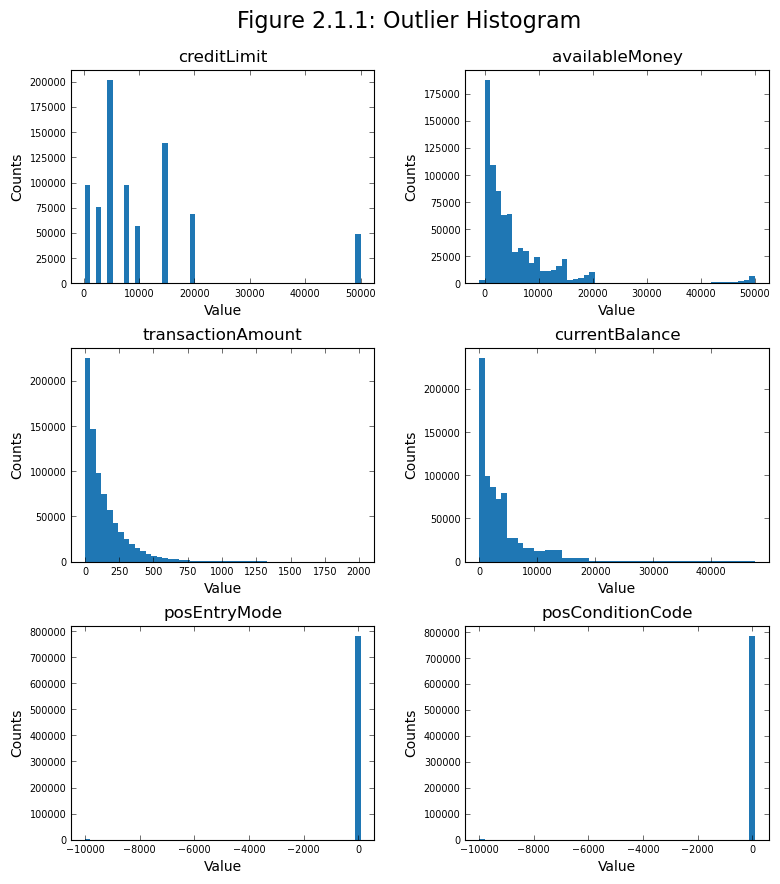

In [1]:
from IPython.display import Image
Image(filename='../outputs/outlier.png') 

Then we solve the problem of missing values. I first count the number of samples with missing values(4820) and variables with missing values (`merchantCountryCode`: 663, `acqCountry`: 4172, `transactionType`:649, they are all categorical data, with 5, 5 and 4 categories respectively). I assume they are missing randomly and the number is not large when we compare it with the dataset, so I drop them directly without adding new categories.  
  
One more thing to pay attention to is the time variable: `transactionDateTime`, `accountOpenDate`, `dateOfLastAddressChange`, `currentExpDate`. I convert it from String to datetime format.  
  
Similarly, for `enteredCVV`, `cardCVV`, `cardLast4Digits`, the data type is **int64**, and the length of CVV should be 3 and `cardLast4Digits` digits means 4 digits. However, when the first number is zero, the number of digits will change, then add zero before these numbers and turn them into String data form. Also, when a transaction happens, the `enteredCVV` should match the `cardCVV`, according to this information, we add a column called `CVVMatched` with 1: True and 0: False. 

### 2.2 Analysis and visualization

With the column `CVVMatched` we get, there are 6399 miss match. We can find from the proportion bar plot below (Figure 2.1.1), when the `enteredCVV` and `the cardCVV` don't match, it is more likely to the occurence of a fraud.

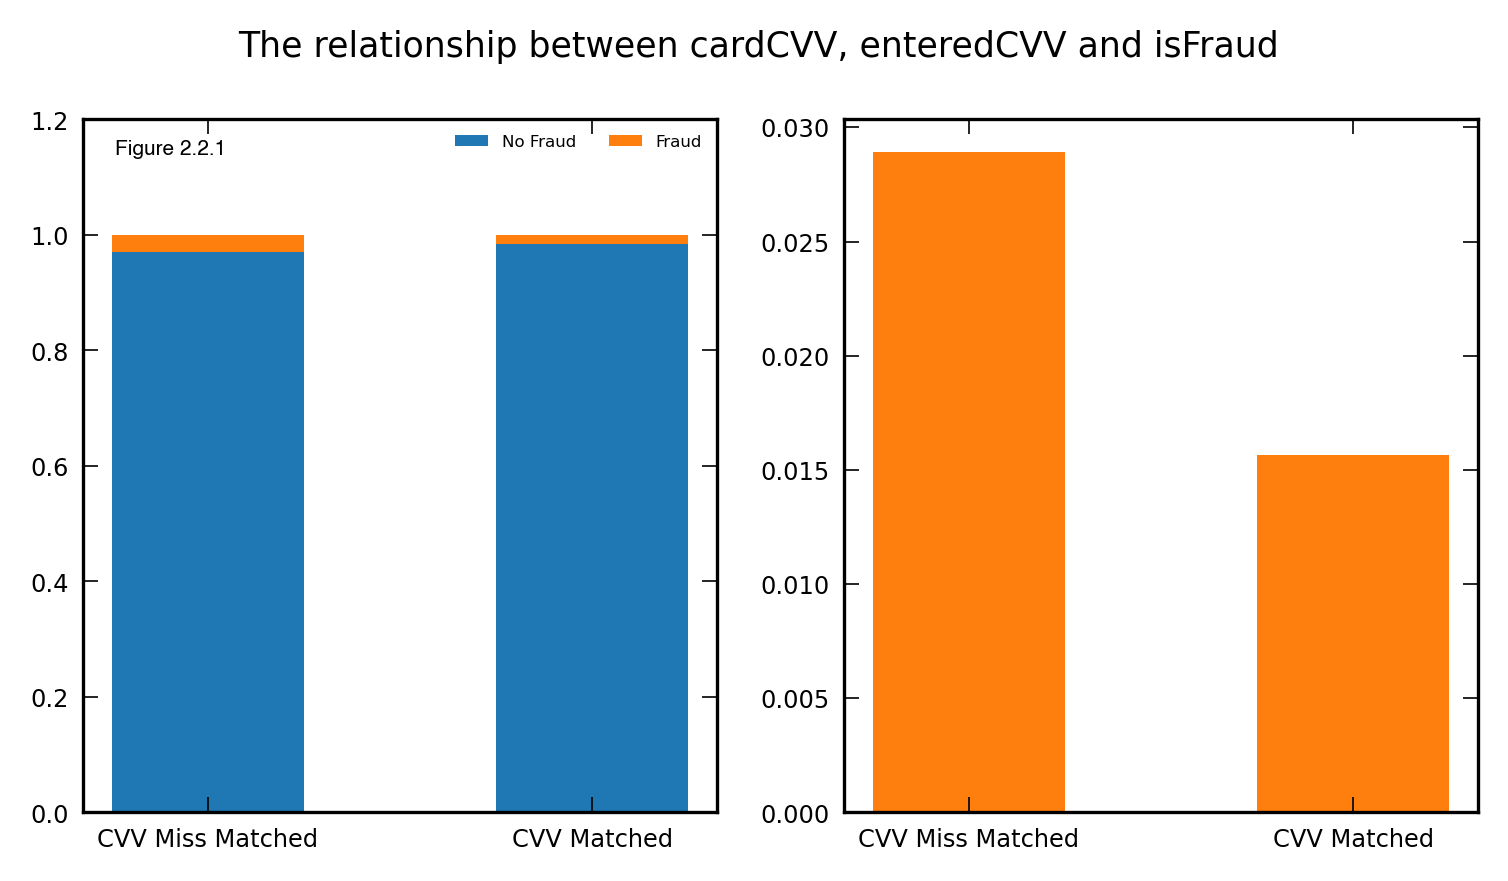

In [2]:
# jupyter nbconvert Report.ipynb --to pdf --TemplateExporter.exclude_input=True
Image(filename='../outputs/output1.png') 

Then I use histogram to find the trend and the disrtibution of `transactionAmount`. From the histogram, I find the `transactionAmount` follows an approximately exponential distribution with $\lambda$ = 136.66 as shown below (Figure 2.2.2). I sample from exponential distribution and get the fitted result.  

In [3]:
# Image(filename='../outputs/output2.png') 

Hereafter, I investigate the categorical variables including `creditLimit`,`merchantCategoryCode`, `posEntryMode`, `transactionType`, `posConditionCode`, and `merchantCountryCode` with bar charts, and get Figure 2.2.3. From the result, I find `creditLimit`, `merchantCountryCode`, `posConditionCode` don't show obvious difference of `isFraud` between defferent categories I can also use **Pearson Chi-Sqaure test** to check if their are obvious differences between different kinds. Intuitively, for practice, we only include `merchantCategoryCode`, `posEntryMode`, `transactionType`, in our predictor model. We may consider using Cart decision tree to involve these variables

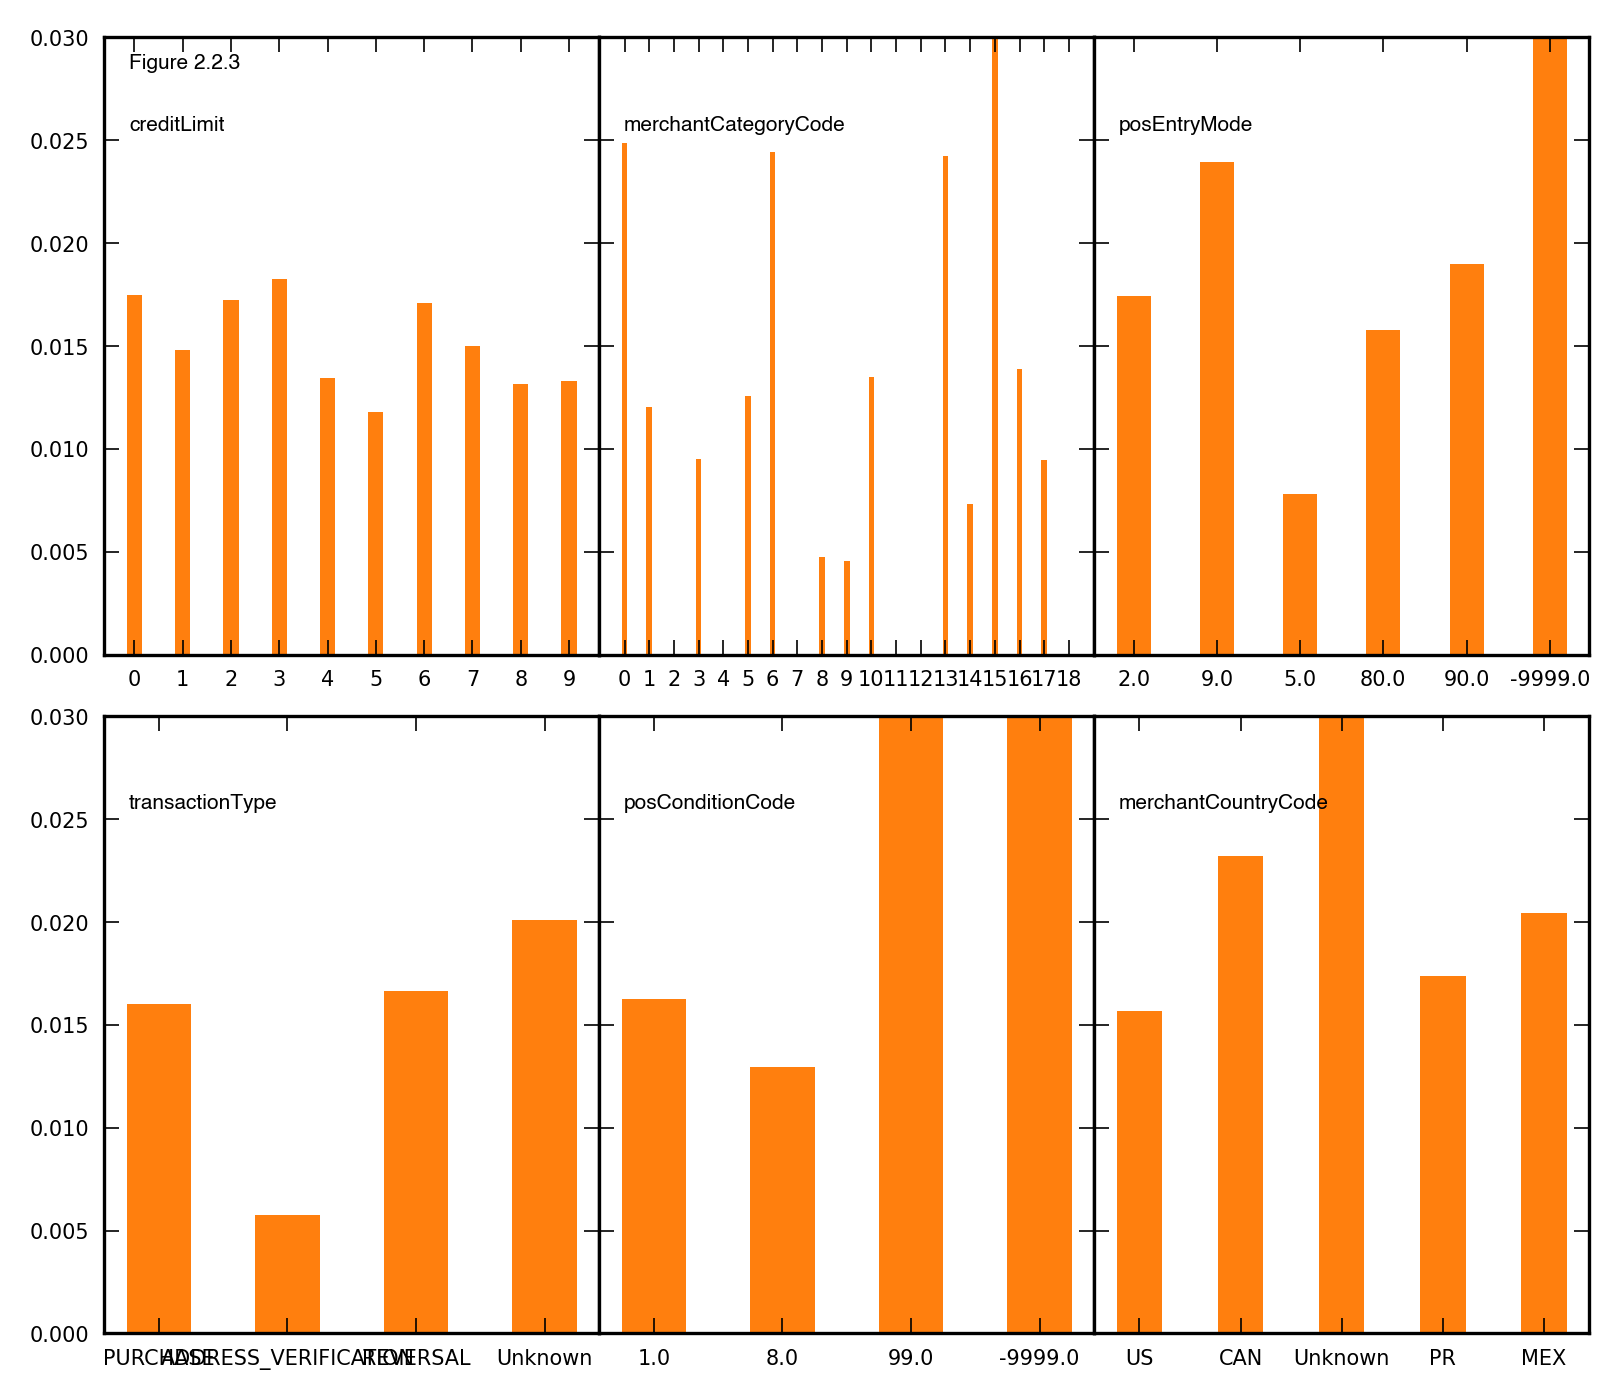

In [4]:
# Image(filename = "../outputs/outputs3.png")

Also, to get further understanding the relationship between two varaibles mentioned above and `isFraud`: `merchantCountryCode`, `transactionType`. To condition on `merchantCountryCode`, we firstly draw the marginal distribution and then visualize with bar chart(drop following categories: mobileapps, food_delivery, gym, online_subscriptions, fuel, cable/phone, because they don't contain Fraud) as shown in Figure 2.2.4. It is obvios, in contrast with the dropped categories, for "airline" given the `transactionType` being "REVERSAL", it is the most likely to be a Fraud. Another noticeable fact is that the Fraud is less possible to happen when the `transactionType` is "ADDRESS_VERIFICATION".  

|**Variables**|PURCHASE|ADDRESS_VERIFICATION|REVERSAL|**sum**|  
|---|---|---|---|---|
| rideshare | 0.025 | 0.006 | 0.025 | 0.056 |
| entertainment | 0.011 | 0.01 | 0.012 | 0.033 |
| mobileapps | 0.0 | 0.0 | 0.0 | 0.0 |
| fastfood | 0.009 | 0.007 | 0.007 | 0.023 |
| food_delivery | 0.0 | 0.0 | 0.0 | 0.0 |
| auto | 0.013 | 0.004 | 0.009 | 0.026 |
| online_retail | 0.023 | 0.004 | 0.021 | 0.048 |
| gym | 0.0 | 0.0 | 0.0 | 0.0 |
| health | 0.005 | 0.002 | 0.004 | 0.011 |
| personal care | 0.005 | 0.004 | 0.006 | 0.015 |
| food | 0.013 | 0.006 | 0.012 | 0.031 |
| fuel | 0.0 | 0.0 | 0.0 | 0.0 |
| online_subscriptions | 0.0 | 0.0 | 0.0 | 0.0 |
| online_gifts | 0.024 | 0.002 | 0.022 | 0.048 |
| hotels | 0.008 | 0.0 | 0.006 | 0.014 |
| airline | 0.034 | 0.02 | 0.055 | 0.109 |
| furniture | 0.014 | 0.01 | 0.005 | 0.029 |
| subscriptions | 0.009 | 0.003 | 0.006 | 0.018 |
| cable/phone | 0.0 | 0.0 | 0.0 | 0.0 |
| **sum** | 0.193 | 0.078 | 0.19 | 0.461 |

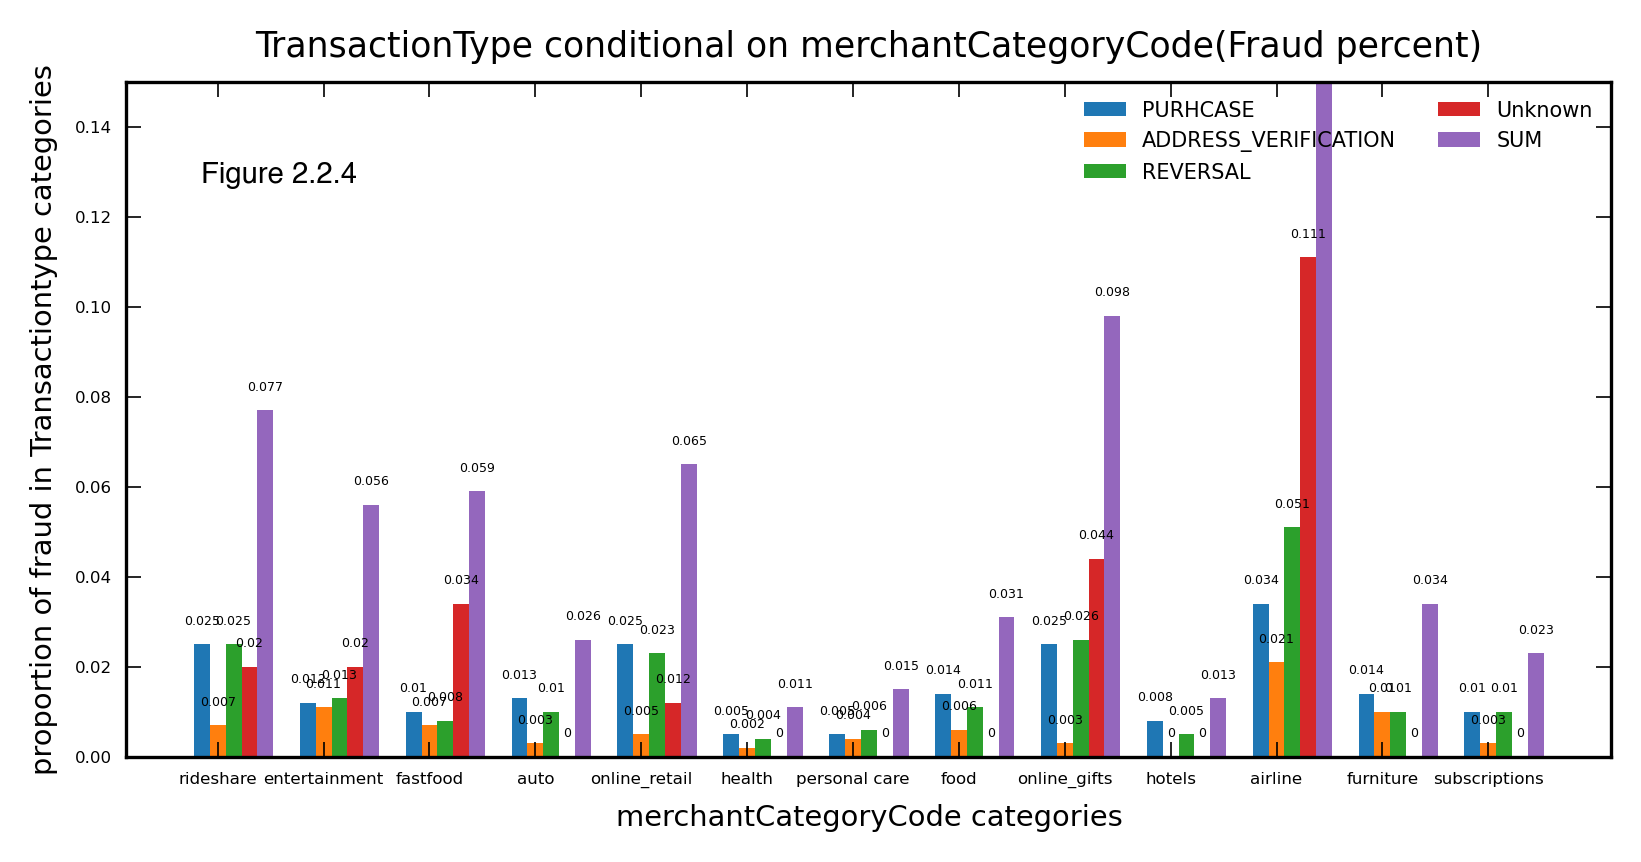

In [5]:
Image(filename = "../outputs/output4.png")

From the data type table above, I can find numerical variables: `availableMoney`, `transactionAmount` and `currentBalance`. To see the distribution of the Fraud samples and the relationship betwenn these variables, I use 2D hitogram to analyze it as shown in Figure 2.2.5. From the figure, no matter given which variables, fraud tends to happen with small amount of money. I can also see obvious stripes of availableMoney. From it, I think the data distribution is not balanced for different amounnt of money, larger amount of money may correspond to fewer samples, which may also lead me to get the conclusion above. 

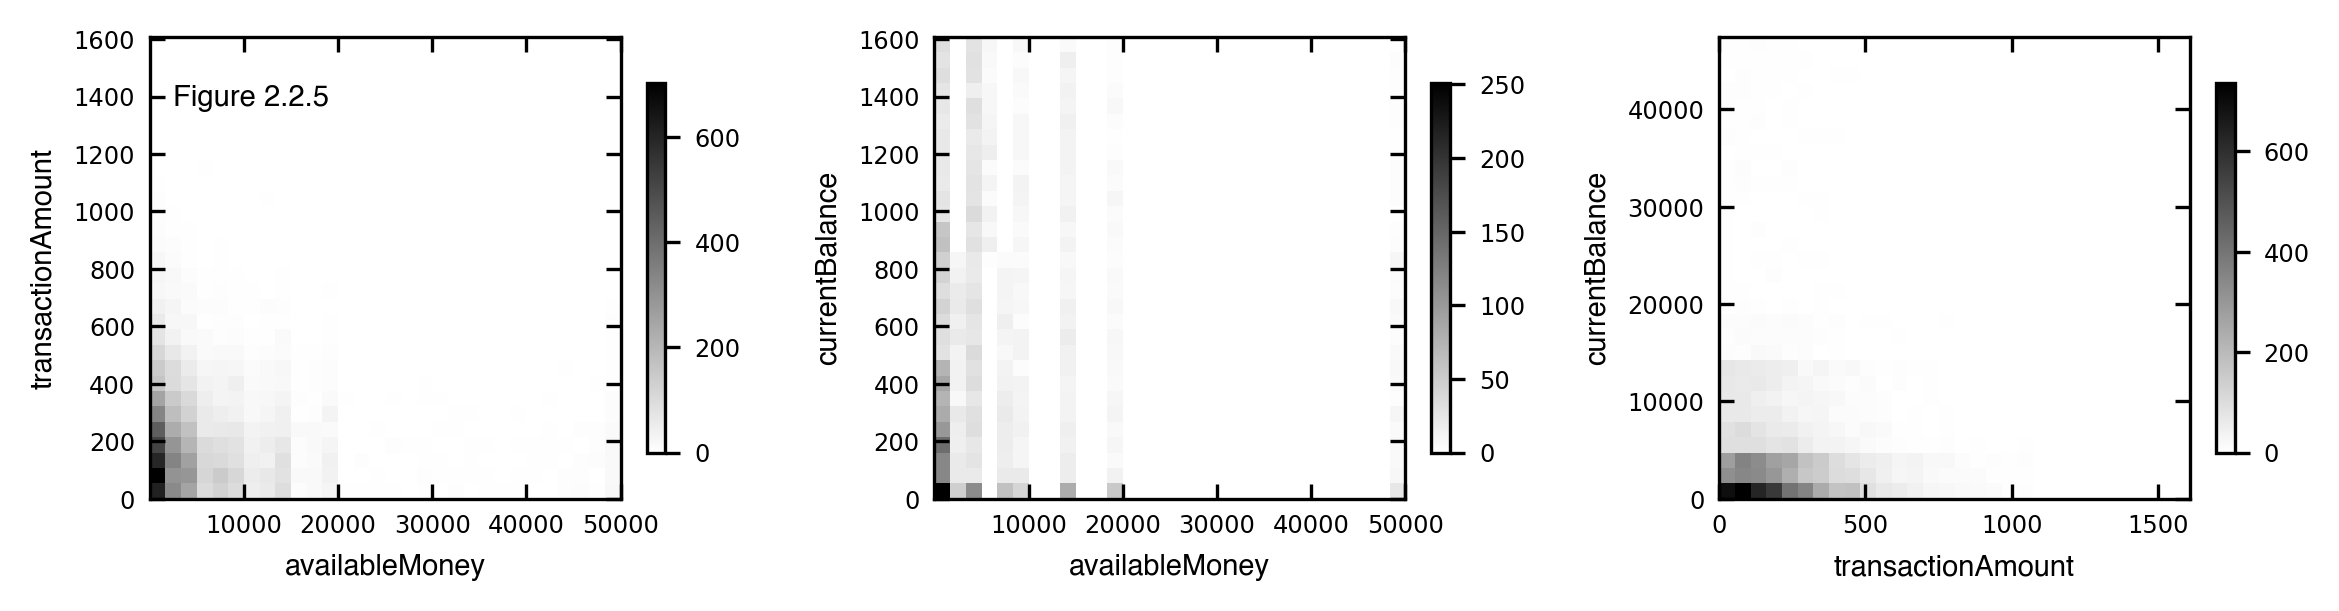

In [6]:
Image(filename="../outputs/output5.png")

### 2.3 Multi-swipe transactions

Multi-swipe transactions are transactions in which the same card or account is charged multiple times in a short time span for the same or similar amount, I assume it may be the ground zero for fraud. Then I set time difference to be 5 minutes, if during this period, the same amount of transactions happen more than once, I will record it. Among 712486 samples, 11606(1.63%) are multi-swipe transactions. I find multi-swipe transaction highly correlates with fraud positively. We find 1.73% are Fraud, which is over the average Fraud rate 1.58%. The total transaction amount is about 1710163. However, one thing to pay attention to is that the first transaction tends to be normal, there are 2442 such samples. After removing them, we find the Fraud rate rises to 1.84%. I find the first transaction tends to be normal and the following transactions are more possible to be a Fraud.

### 3.2 Imbalance

There is also another important issue to pay attention to is the imbalance distribution with respect to `isFraud`. The number of samples of Fraud is 10733(1.52%).The number of non-fraudulent transactions far outweighs the number of fraudulent transactions in the dataset. Though it is not often to find a fraud during the transactions, this imbalance situation can have a signinficant effect on developing accurate predictive models. There are some potential implicationns:  
1. The predictive model may have a bias towards the majority class, which is the non-fraudulent transactions in this case. This happens because the model is trained on a larger number of non-fraudulent transactions, which may result in it failing to capture the patterns and characteristics of fraudulent transactions accurately. As a result, the model may perform poorly in identifying fraud.  
2. It can lead to a high rate of false negatives. This means that the model fails to identify fraudulent transactions, which can result in significant financial losses for both credit card companies and their customers.  
3. It can cause a high rate of false positives. This implies that the model wrongly categorizes non-fraudulent transactions as fraudulent.

I prefer to use GAN model to genereate Fraud samples. For the generator, it is to generate a sample with the features mentioned above with `isFraud` being True. For the discriminator, it is to find that the generated sample should not be given a True label. In this way, generator and discriminator improve together to provide us with highly simulated fraudulent samples. Stack them together to realize over sampling. Here, to make it simple, I use randomly selecting and duplicating instances from the minority class (fraudulent transactions) to create a balanced class distribution(RandomOverSampler with random_state = 415). Then we have the balanced dataset, with #Fraud = #Non-Fraud = 701753. As shown below:

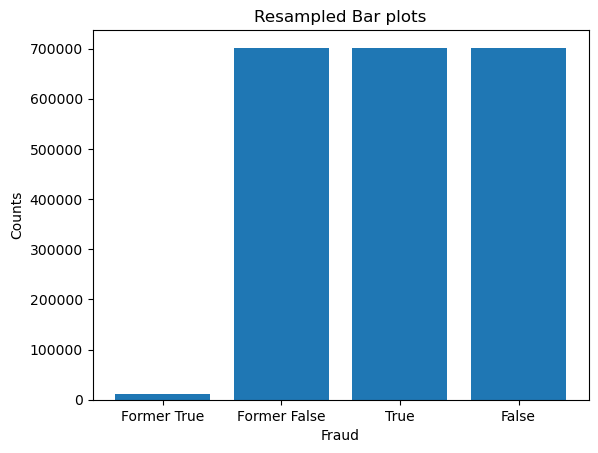

In [8]:
Image(filename="../outputs/outputFinal.png")

Mitigating class imbalance can have a significant impact on the effectiveness and performance of a credit card fraud detection predictive model. A balanced class distribution helps the model capture fraudulent transaction patterns and characteristics more accurately, resulting in better detection accuracy. Moreover, it decreases the false-negative rate, which is critical in preventing financial losses due to fraudulent transactions. However, oversampling may also increase the false-positive rate, where non-fraudulent transactions are incorrectly flagged as fraudulent, causing inconvenience to customers and higher costs for credit card companies. As a result, evaluating the predictive model's performance post addressing class imbalance is necessary to ensure its accuracy and efficacy.  
Also, different addressinng methods may also affect the results, and I think the dataset genereated by GAN may have better results.

I share some of my idea on multi-swipe transaction and imbalance with Shuo Han.